In [ ]:
# 量子ビットを理解する（量子位相推定）

In [ ]:
!pip install -U pip
!pip install numpy matplotlib ipython 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

## 初期状態の設定

In [2]:
#量子bit×3の生成
import dataclasses
@dataclasses.dataclass
class Qbit:
    phi: float # ブロッホ球での|0>からの角度
    shift: float # 位相差

#量子bit0
Q1 = Qbit(math.pi*0.5,math.pi*0)
#量子bit1
Q2 = Qbit(math.pi*0.5,math.pi*0)
#量子bit2
Q3 = Qbit(math.pi*0.5,math.pi*0)
#量子bit dummy
Qd = Qbit(math.pi*1,math.pi*0) #Xゲート設定後

## 諸元算出

In [5]:
def createYo():
    yo = np.arange(0,2,0.001)*math.pi
    return yo

def createBy1bit(q_0:Qbit):
    # 初期の各量子bit列の波の軸
    yo = createYo()
    q0 = math.cos(q_0.phi/2) * np.sin(yo)
    q1 = math.sin(q_0.phi/2) * np.sin(yo-q_0.shift)
    return q0,q1

def createBy2bit(q_1:Qbit,q_2:Qbit):
    # 初期の各量子bit列の波の軸
    yo  = createYo()
    q00 = (math.cos(q_1.phi/2) * math.cos(q_2.phi/2))*np.sin(yo)
    q01 = (math.cos(q_1.phi/2) * math.sin(q_2.phi/2))*np.sin(yo-(q_2.shift))
    q10 = (math.sin(q_1.phi/2) * math.cos(q_2.phi/2))*np.sin(yo-(q_1.shift))
    q11 = (math.sin(q_1.phi/2) * math.sin(q_2.phi/2))*np.sin(yo-(q_1.shift+q_2.shift))
    return q00,q01,q10,q11

def createBy3bit(q_1:Qbit,q_2:Qbit,q_3:Qbit):
    # 初期の各量子bit列の波の軸
    yo  = createYo()
    q000 = (math.cos(q_1.phi/2) * math.cos(q_2.phi/2) * math.cos(q_3.phi/2))*np.sin(yo)
    q001 = (math.cos(q_1.phi/2) * math.cos(q_2.phi/2) * math.sin(q_3.phi/2))*np.sin(yo-(q_3.shift))
    q010 = (math.cos(q_1.phi/2) * math.sin(q_2.phi/2) * math.cos(q_3.phi/2))*np.sin(yo-(q_2.shift))
    q011 = (math.cos(q_1.phi/2) * math.sin(q_2.phi/2) * math.sin(q_3.phi/2))*np.sin(yo-(q_2.shift+q_3.shift))
    q100 = (math.sin(q_1.phi/2) * math.cos(q_2.phi/2) * math.cos(q_3.phi/2))*np.sin(yo-(q_1.shift))
    q101 = (math.sin(q_1.phi/2) * math.cos(q_2.phi/2) * math.sin(q_3.phi/2))*np.sin(yo-(q_1.shift+q_3.shift))
    q110 = (math.sin(q_1.phi/2) * math.sin(q_2.phi/2) * math.cos(q_3.phi/2))*np.sin(yo-(q_1.shift+q_2.shift))
    q111 = (math.sin(q_1.phi/2) * math.sin(q_2.phi/2) * math.sin(q_3.phi/2))*np.sin(yo-(q_1.shift+q_2.shift+q_3.shift))
    return q000,q001,q010,q011,q100,q101,q110,q111

def createBy4bit(q1:Qbit,q2:Qbit,q3:Qbit,q4:Qbit):
    # 初期の各量子bit列の波の軸
    yo  = createYo()
    q0000 = (math.cos(q1.phi/2) * math.cos(q2.phi/2) * math.cos(q3.phi/2)* math.cos(q4.phi/2)) *np.sin(yo)
    q0001 = (math.cos(q1.phi/2) * math.cos(q2.phi/2) * math.cos(q3.phi/2)* math.sin(q4.phi/2)) *np.sin(yo-(                           q4.shift))
    q0010 = (math.cos(q1.phi/2) * math.cos(q2.phi/2) * math.sin(q3.phi/2)* math.cos(q4.phi/2)) *np.sin(yo-(                  q3.shift))
    q0011 = (math.cos(q1.phi/2) * math.cos(q2.phi/2) * math.sin(q3.phi/2)* math.sin(q4.phi/2)) *np.sin(yo-(                  q3.shift+q4.shift))
    q0100 = (math.cos(q1.phi/2) * math.sin(q2.phi/2) * math.cos(q3.phi/2)* math.cos(q4.phi/2)) *np.sin(yo-(         q2.shift))
    q0101 = (math.cos(q1.phi/2) * math.sin(q2.phi/2) * math.cos(q3.phi/2)* math.sin(q4.phi/2)) *np.sin(yo-(         q2.shift+         q4.shift))
    q0110 = (math.cos(q1.phi/2) * math.sin(q2.phi/2) * math.sin(q3.phi/2)* math.cos(q4.phi/2)) *np.sin(yo-(         q2.shift+q3.shift))
    q0111 = (math.cos(q1.phi/2) * math.sin(q2.phi/2) * math.sin(q3.phi/2)* math.sin(q4.phi/2)) *np.sin(yo-(         q2.shift+q3.shift+q4.shift))
    q1000 = (math.sin(q1.phi/2) * math.cos(q2.phi/2) * math.cos(q3.phi/2)* math.cos(q4.phi/2)) *np.sin(yo-(q1.shift))
    q1001 = (math.sin(q1.phi/2) * math.cos(q2.phi/2) * math.cos(q3.phi/2)* math.sin(q4.phi/2)) *np.sin(yo-(q1.shift+                  q4.shift))
    q1010 = (math.sin(q1.phi/2) * math.cos(q2.phi/2) * math.sin(q3.phi/2)* math.cos(q4.phi/2)) *np.sin(yo-(q1.shift+         q3.shift))
    q1011 = (math.sin(q1.phi/2) * math.cos(q2.phi/2) * math.sin(q3.phi/2)* math.sin(q4.phi/2)) *np.sin(yo-(q1.shift+         q3.shift+q4.shift))
    q1100 = (math.sin(q1.phi/2) * math.sin(q2.phi/2) * math.cos(q3.phi/2)* math.cos(q4.phi/2)) *np.sin(yo-(q1.shift+q2.shift))
    q1101 = (math.sin(q1.phi/2) * math.sin(q2.phi/2) * math.cos(q3.phi/2)* math.sin(q4.phi/2)) *np.sin(yo-(q1.shift+q2.shift+         q4.shift))
    q1110 = (math.sin(q1.phi/2) * math.sin(q2.phi/2) * math.sin(q3.phi/2)* math.cos(q4.phi/2)) *np.sin(yo-(q1.shift+q2.shift+q3.shift))
    q1111 = (math.sin(q1.phi/2) * math.sin(q2.phi/2) * math.sin(q3.phi/2)* math.sin(q4.phi/2)) *np.sin(yo-(q1.shift+q2.shift+q3.shift+q4.shift))
    
    return q0000,q0001,q0010,q0011,q0100,q0101,q0110,q0111,q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111

## 描画用関数

In [6]:
# 波描画
def set_wave_ax(ax,q,title):
    yo = createYo()
    ax.plot(yo,q)
    ax.set_xticks([0, math.pi*0.5 ,math.pi, math.pi*1.5 ,math.pi*2], ["0", "1/2π", "π","3/2π","2π"])
    ax.set_ylim(-1.1,1.1)
    ax.set_xlim(0,math.pi*2)
    ax.set_title(title)
    return ax
    
def draw_8waves(q000,q001,q010,q011,q100,q101,q110,q111):
    fig = plt.figure(figsize=(16,16)) #図のサイズを決定
    ax_000 = fig.add_subplot(4,2,1)
    ax_001 = fig.add_subplot(4,2,2)
    ax_010 = fig.add_subplot(4,2,3)
    ax_011 = fig.add_subplot(4,2,4)
    ax_100 = fig.add_subplot(4,2,5)
    ax_101 = fig.add_subplot(4,2,6)
    ax_110 = fig.add_subplot(4,2,7)
    ax_111 = fig.add_subplot(4,2,8)

    ax_000 = set_wave_ax(ax_000,q000,"|000>")
    ax_001 = set_wave_ax(ax_001,q001,"|001>")
    ax_010 = set_wave_ax(ax_010,q010,"|010>")
    ax_011 = set_wave_ax(ax_011,q011,"|011>")
    ax_100 = set_wave_ax(ax_100,q100,"|100>")
    ax_101 = set_wave_ax(ax_101,q101,"|101>")
    ax_110 = set_wave_ax(ax_110,q110,"|110>")
    ax_111 = set_wave_ax(ax_111,q111,"|111>")

    plt.subplots_adjust(hspace=0.8)

    plt.show()

    return
    
def draw_4waves(q00,q01,q10,q11):
    fig = plt.figure(figsize=(16,10)) #図のサイズを決定
    ax_00 = fig.add_subplot(4,1,1)
    ax_01 = fig.add_subplot(4,1,2)
    ax_10 = fig.add_subplot(4,1,3)
    ax_11 = fig.add_subplot(4,1,4)

    ax_00 = set_wave_ax(ax_00,q00,"|00>")
    ax_01 = set_wave_ax(ax_01,q01,"|01>")
    ax_10 = set_wave_ax(ax_10,q10,"|10>")
    ax_11 = set_wave_ax(ax_11,q11,"|11>")

    plt.subplots_adjust(hspace=0.4)

    plt.show()

    return

def draw_2waves(q0,q1):
    fig = plt.figure(figsize=(16,2)) #図のサイズを決定
    ax_0 = fig.add_subplot(1,2,1)
    ax_1 = fig.add_subplot(1,2,2)

    ax_0 = set_wave_ax(ax_0,q0,"|0>")
    ax_1 = set_wave_ax(ax_1,q1,"|1>")

    plt.subplots_adjust(hspace=0.4)

    plt.show()

    return

In [7]:
# 振幅描画
def draw_8amp(q000,q001,q010,q011,q100,q101,q110,q111):

    from matplotlib import rcParams
    plt.rcParams["font.family"] = "MS Gothic"

    fig = plt.figure()
    ax = fig.subplots()

    # データの準備
    categories = ['|000>', '|001>', '|010>','|011>','|100>', '|101>', '|110>','|111>']
    values = [max(q000)**2, max(q001)**2, max(q010)**2, max(q011)**2,max(q100)**2, max(q101)**2, max(q110)**2, max(q111)**2]

    # 棒グラフの作成
    ax.bar(categories, values)

    # タイトルとラベルの追加
    ax.set_title('振幅')
    ax.set_ylim(0,1.1)

    # グラフの表示
    plt.show()

    return
    
def draw_4amp(q00,q01,q10,q11):

    from matplotlib import rcParams
    plt.rcParams["font.family"] = "MS Gothic"

    fig = plt.figure()
    ax = fig.subplots()

    # データの準備
    categories = ['|00>', '|01>', '|10>','|11>']
    values = [max(q00)**2, max(q01)**2, max(q10)**2, max(q11)**2]

    # 棒グラフの作成
    ax.bar(categories, values)

    # タイトルとラベルの追加
    ax.set_title('振幅')
    ax.set_ylim(0,1.1)

    # グラフの表示
    plt.show()

    return

def draw_2amp(q0,q1):

    from matplotlib import rcParams
    plt.rcParams["font.family"] = "MS Gothic"

    fig = plt.figure()
    ax = fig.subplots()

    # データの準備
    categories = ['|0>', '|1>']
    values = [max(q0)**2, max(q1)**2]

    # 棒グラフの作成
    ax.bar(categories, values)

    # タイトルとラベルの追加
    ax.set_title('振幅')
    ax.set_ylim(0,1.1)

    # グラフの表示
    plt.show()

    return

In [8]:
# 位相描画
def set_phase_ax(ax,q,title):
    shape = patches.Circle(xy=(0,0), radius=1, facecolor="white", edgecolor="black", linewidth=1)

    s = phase_pi(q)

    ax.add_patch(shape)
    ax.plot([0,np.sin(s)],[0,np.cos(s)],color='gray')
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.axis('off')
    if max(q) > 0.0001:
        ax.text(-0.28,-1.35,str(round(s/math.pi,2)),color='black',fontsize=16)
    else:
        ax.text(-0.28,-1.35,"---",color='black',fontsize=16)
    return
    
def draw_8phase(q000,q001,q010,q011,q100,q101,q110,q111):

    fig = plt.figure(figsize=(16,3)) #図のサイズを決定
    ax_000 = fig.add_subplot(1,8,1)
    ax_001 = fig.add_subplot(1,8,2)
    ax_010 = fig.add_subplot(1,8,3)
    ax_011 = fig.add_subplot(1,8,4)
    ax_100 = fig.add_subplot(1,8,5)
    ax_101 = fig.add_subplot(1,8,6)
    ax_110 = fig.add_subplot(1,8,7)
    ax_111 = fig.add_subplot(1,8,8)
    fig = plt.figure()

    ax_000 = set_phase_ax(ax_000,q000,"|000>")
    ax_001 = set_phase_ax(ax_001,q001,"|001>")
    ax_010 = set_phase_ax(ax_010,q010,"|010>")
    ax_011 = set_phase_ax(ax_011,q011,"|011>")
    ax_100 = set_phase_ax(ax_100,q100,"|100>")
    ax_101 = set_phase_ax(ax_101,q101,"|101>")
    ax_110 = set_phase_ax(ax_110,q110,"|110>")
    ax_111 = set_phase_ax(ax_111,q111,"|111>")

    plt.show()

    return

def draw_4phase(q00,q01,q10,q11):

    fig = plt.figure(figsize=(16,5)) #図のサイズを決定
    ax_00 = fig.add_subplot(1,4,1)
    ax_01 = fig.add_subplot(1,4,2)
    ax_10 = fig.add_subplot(1,4,3)
    ax_11 = fig.add_subplot(1,4,4)
    fig = plt.figure()

    ax_00 = set_phase_ax(ax_00,q00,"|00>")
    ax_01 = set_phase_ax(ax_01,q01,"|01>")
    ax_10 = set_phase_ax(ax_10,q10,"|10>")
    ax_11 = set_phase_ax(ax_11,q11,"|11>")

    plt.show()

    return

def draw_2phase(q0,q1):

    fig = plt.figure(figsize=(8,4)) #図のサイズを決定
    ax_0 = fig.add_subplot(1,2,1)
    ax_1 = fig.add_subplot(1,2,2)
    fig = plt.figure()

    ax_0 = set_phase_ax(ax_0,q0,"|0>")
    ax_1 = set_phase_ax(ax_1,q1,"|1>")

    plt.show()

    return

# 以下 関数の定義

# 単量子ゲート

### アダマールゲート
$$
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

In [9]:
#アダマール変換 
# やっていること：|1>を反転させ、反時計周りに1/4π回転させる
def h_gate(x,z):
    x_ = ( x + z)/2**0.5
    z_ = ( x - z)/2**0.5
    return x_,z_

### Tゲート
$$
T =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{4})
\end{pmatrix}
$$

In [10]:
#Tゲート変換 
# やっていること：|1>の位相を1/4π（45°）進める
def t_gate(x,z):
    x_ = x
    z_ = np.roll(z,len(z)//8)
    return x_,z_

### Sゲート
$$
S =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{2})
\end{pmatrix}
$$

In [11]:
#Sゲート変換 
# やっていること：|1>の位相を1/2π（90°）進める
def s_gate(x,z):
    x_ = x
    z_ = np.roll(z,len(z)//4)
    return x_,z_

### Xゲート
$$
X =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

In [12]:
#Xゲート変換 
# やっていること：|0>←→|1>を交換する
def x_gate(x,z):
    x_ = z
    z_ = x
    return x_,z_

### Yゲート
$$
Y =
\begin{pmatrix}
0 & exp(\frac{-i\pi}{2}) \\
exp(\frac{i\pi}{2})  & 0
\end{pmatrix}
$$

In [13]:
#Yゲート変換 
# やっていること：|0>→i|1>、|1>→-i|0>
def y_gate(x,z):
    x_ = np.roll(z,(len(z)+1)//4)
    z_ = np.roll(x,-(len(x)+1)//4)
    return x_,z_

### Zゲート
$$
Z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

In [14]:
#Zゲート変換 
# やっていること：|1>の符号を反転させる
def z_gate(x,z):
    x_ = x
    z_ = -z
    return x_,z_

## 位相判定

In [15]:
def phase(x):
    i = 0
    if max(x) < 0.00001:
        return 0
    for i in range(len(x)+1):
        if x[i%len(x)] <= 0.00001:#本来は0.0とすべきであるが、誤差を考慮し微小値を基準とした
            if x[(i+1)%len(x)] > 0.0:
                break
    return i%len(x)

In [16]:
def phase_pi(x):
    return phase(x)/len(x)*2*math.pi

## ２量子ゲート

## アダマールゲート

### 上下位ビットに対するゲート操作
$
H
\otimes
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1
\otimes
H
&
1
\otimes
H
\\
1
\otimes
H
&
-1
\otimes
H
\end{pmatrix}
=
\frac{1}{2}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1
\end{pmatrix}
$

In [17]:
def hh_gate(q00,q01,q10,q11):
    q00_ = (q00+q01+q10+q11)*0.5
    q01_ = (q00-q01+q10-q11)*0.5
    q10_ = (q00+q01-q10-q11)*0.5
    q11_ = (q00-q01-q10+q11)*0.5
    return q00_,q01_,q10_,q11_

### SWAP
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$

In [18]:
#SWAP
def swap(q01,q10):
    q01_,q10_ = x_gate(q01,q10)
    return q01_,q10_

### CX(high bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$

### CX(low bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}
$

In [19]:
#cx(Highをコントロールビット、lowを標的ビットとした場合)
def cx_high_control(q00,q01,q10,q11):
    q10_,q11_ = x_gate(q10,q11)
    return q00,q01,q10_,q11_

In [20]:
#cx(Highを標的ビット、lowをコントロールビットとした場合)
def cx_low_control(q00,q01,q10,q11):
    q01_,q11_ = x_gate(q01,q11)
    return q00,q01_,q10,q11_

## X$\otimes$Xゲート
$
X
\otimes
X =
\begin{pmatrix}
0
\otimes
X
&
1
\otimes
X
\\
1
\otimes
X
&
0
\otimes
X
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0
\end{pmatrix}
$

In [21]:
def xx_gate(q00,q01,q10,q11):
    q01_,q10_ = x_gate(q01,q10)
    q00_,q11_ = x_gate(q00,q11)
    return q00_,q01_,q10_,q11_

## 汎用Zゲート

In [22]:
#汎用Zゲート 
def z_gate(q00,q01,q10,q11,target):
    if target=='00':
      q00_ = -q00
      q01_ = q01
      q10_ = q10
      q11_ = q11
    elif target=='01':
      q00_ = q00
      q01_ = -q01
      q10_ = q10
      q11_ = q11
    elif target=='10':
      q00_ = q00
      q01_ = q01
      q10_ = -q10
      q11_ = q11 
    elif target=='11':
      q00_ = q00
      q01_ = q01
      q10_ = q10
      q11_ = -q11
    else:
      q00_ = q00
      q01_ = q01
      q10_ = q10
      q11_ = q11
      print('CZ gate not changed')
    return q00_,q01_,q10_,q11_

### グローバル位相のキャンセル

In [23]:
def global_phase4(x00,x01,x10,x11):
    if max(x00) >= 0.00001:
        x = x00
    elif max(x01) >= 0.00001:
        x = x01
    elif max(x10) >= 0.00001:
        x = x10
    else:
        x = x11      
    return phase(x)
    
def cancel_global_shift4(x00,x01,x10,x11):
    p = global_phase4(x00,x01,x10,x11)
    x00_ = np.roll(x00,-p)
    x01_ = np.roll(x01,-p)
    x10_ = np.roll(x10,-p)
    x11_ = np.roll(x11,-p)
    return x00_,x01_,x10_,x11_

def global_phase8(x000,x001,x010,x011,x100,x101,x110,x111):
    if max(x000) >= 0.00001:
        x = x000
    elif max(x001) >= 0.00001:
        x = x001
    elif max(x010) >= 0.00001:
        x = x010
    elif max(x011) >= 0.00001:
        x = x011
    elif max(x100) >= 0.00001:
        x = x100
    elif max(x101) >= 0.00001:
        x = x101
    elif max(x110) >= 0.00001:
        x = x110
    else:
        x = x111
    return phase(x)
    
def cancel_global_shift8(x000,x001,x010,x011,x100,x101,x110,x111):
    p = global_phase8(x000,x001,x010,x011,x100,x101,x110,x111)
    x000_ = np.roll(x000,-p)
    x001_ = np.roll(x001,-p)
    x010_ = np.roll(x010,-p)
    x011_ = np.roll(x011,-p)
    x100_ = np.roll(x100,-p)
    x101_ = np.roll(x101,-p)
    x110_ = np.roll(x110,-p)
    x111_ = np.roll(x111,-p)
    return x000_,x001_,x010_,x011_,x100_,x101_,x110_,x111_

## 量子ビットの合成

In [24]:
def merge1to2(q0,q1,q00,q01,q10,q11):
    # 初期の各量子bit列の波の軸
    q000 = np.roll(q0*max(q00),phase(q00))
    q001 = np.roll(q0*max(q01),phase(q01))
    q010 = np.roll(q0*max(q10),phase(q10))
    q011 = np.roll(q0*max(q11),phase(q11))
    q100 = np.roll(q1*max(q00),phase(q00))
    q101 = np.roll(q1*max(q01),phase(q01))
    q110 = np.roll(q1*max(q10),phase(q10))
    q111 = np.roll(q1*max(q11),phase(q11))
    return q000,q001,q010,q011,q100,q101,q110,q111

# Let's Try

## 位相キックバック

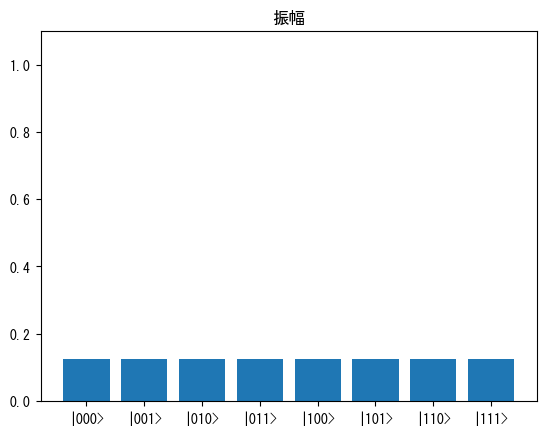

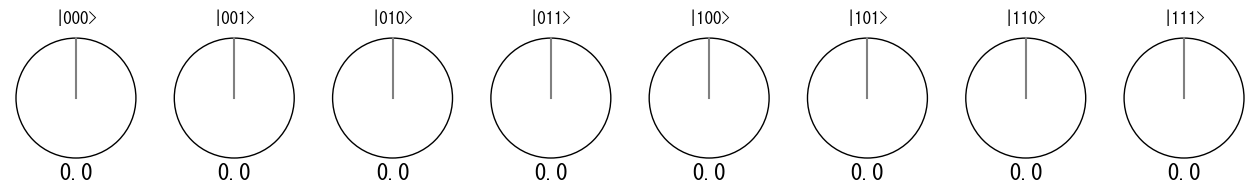

<Figure size 640x480 with 0 Axes>

In [144]:
#初期状態の設定
q0000,q0001,q0010,q0011,q0100,q0101,q0110,q0111,q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111 = createBy4bit(Qd,Q3,Q2,Q1)
#draw_8waves(q000,q001,q010,q011,q100,q101,q110,q111)
draw_8amp(q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111)
draw_8phase(q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111)

In [145]:
#推定させる位相を(適当に)設定 1π=1000 0～2000で
P=300 #

In [146]:
#Q1をコントロール、QdをターゲットとしたPゲート
q1001 = np.roll(q1001,P)
q1011 = np.roll(q1011,P)
q1101 = np.roll(q1101,P)
q1111 = np.roll(q1111,P)

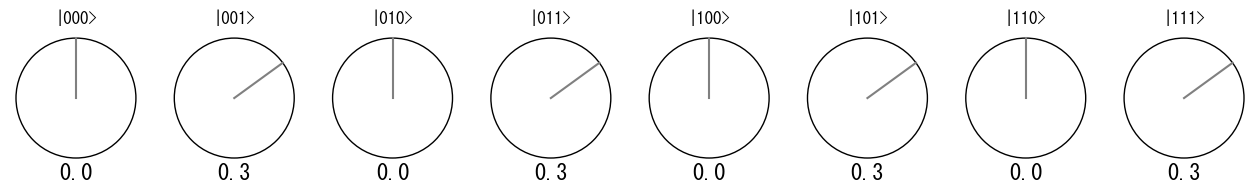

<Figure size 640x480 with 0 Axes>

In [147]:
draw_8phase(q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111)

In [148]:
#Q2をコントロール、QdをターゲットとしたPゲート
q1010 = np.roll(q1010,P*2)
q1011 = np.roll(q1011,P*2)
q1110 = np.roll(q1110,P*2)
q1111 = np.roll(q1111,P*2)

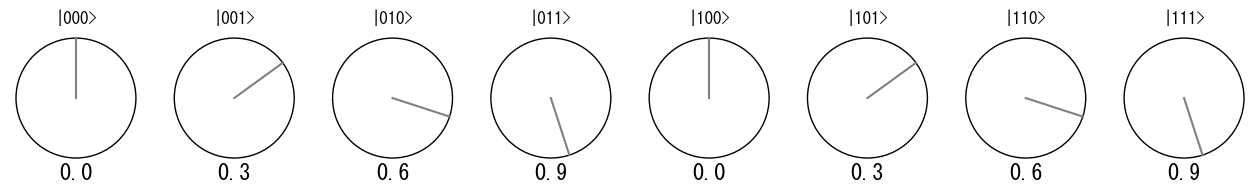

<Figure size 640x480 with 0 Axes>

In [149]:
draw_8phase(q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111)

In [150]:
#Q3をコントロール、QdをターゲットとしたPゲート
q1100 = np.roll(q1100,P*4)
q1101 = np.roll(q1101,P*4)
q1110 = np.roll(q1110,P*4)
q1111 = np.roll(q1111,P*4)

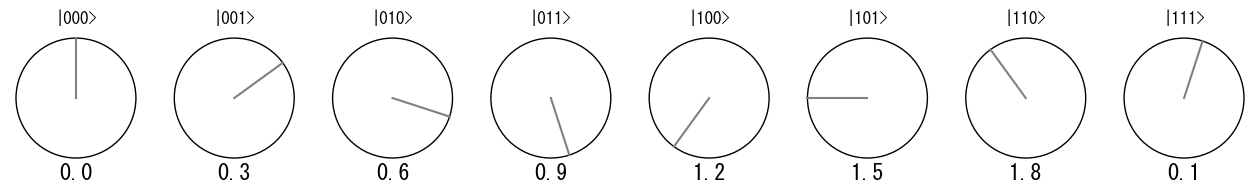

<Figure size 640x480 with 0 Axes>

In [151]:
draw_8phase(q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111)

### 位相推定

In [152]:
#Q1-Q3 SWAP
q0001,q0100 = x_gate(q0001,q0100)
q0011,q0110 = x_gate(q0011,q0110)
q1001,q1100 = x_gate(q1001,q1100)
q1011,q1110 = x_gate(q1011,q1110)

In [153]:
#Q1へのアダマール
q0000,q0001 = h_gate(q0000,q0001)
q0010,q0011 = h_gate(q0010,q0011)
q0100,q0101 = h_gate(q0100,q0101)
q0110,q0111 = h_gate(q0110,q0111)
q1000,q1001 = h_gate(q1000,q1001)
q1010,q1011 = h_gate(q1010,q1011)
q1100,q1101 = h_gate(q1100,q1101)
q1110,q1111 = h_gate(q1110,q1111)

In [154]:
#Q1をコントロール、Q2をターゲットとしたSゲート
q0011 = np.roll(q0011,-len(q0011)//4)
q0111 = np.roll(q0111,-len(q0111)//4)
q1011 = np.roll(q1011,-len(q1011)//4)
q1111 = np.roll(q1111,-len(q1111)//4)

In [155]:
#Q1をコントロール、Q3をターゲットとしたSゲート
q0101 = np.roll(q0101,-len(q0101)//8)
q0111 = np.roll(q0111,-len(q0111)//8)
q1101 = np.roll(q1101,-len(q1101)//8)
q1111 = np.roll(q1111,-len(q1111)//8)

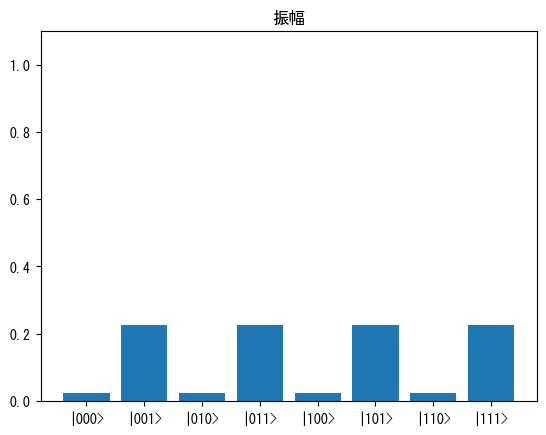

In [156]:
draw_8amp(q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111)

In [157]:
#Q2へのアダマール
q0000,q0010 = h_gate(q0000,q0010)
q0001,q0011 = h_gate(q0001,q0011)
q0100,q0110 = h_gate(q0100,q0110)
q0101,q0111 = h_gate(q0101,q0111)
q1000,q1010 = h_gate(q1000,q1010)
q1001,q1011 = h_gate(q1001,q1011)
q1100,q1110 = h_gate(q1100,q1110)
q1101,q1111 = h_gate(q1101,q1111)

In [158]:
#Q2をコントロール、Q3をターゲットとしたSゲート
q0110 = np.roll(q0110,-len(q0110)//4)
q0111 = np.roll(q0111,-len(q0111)//4)
q1110 = np.roll(q1110,-len(q1110)//4)
q1111 = np.roll(q1111,-len(q1111)//4)

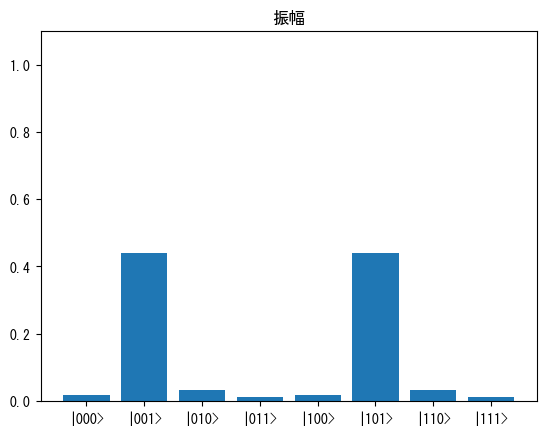

In [159]:
draw_8amp(q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111)

In [160]:
#Q3へのアダマール
q0000,q0100 = h_gate(q0000,q0100)
q0001,q0101 = h_gate(q0001,q0101)
q0010,q0110 = h_gate(q0010,q0110)
q0011,q0111 = h_gate(q0011,q0111)
q1000,q1100 = h_gate(q1000,q1100)
q1001,q1101 = h_gate(q1001,q1101)
q1010,q1110 = h_gate(q1010,q1110)
q1011,q1111 = h_gate(q1011,q1111)

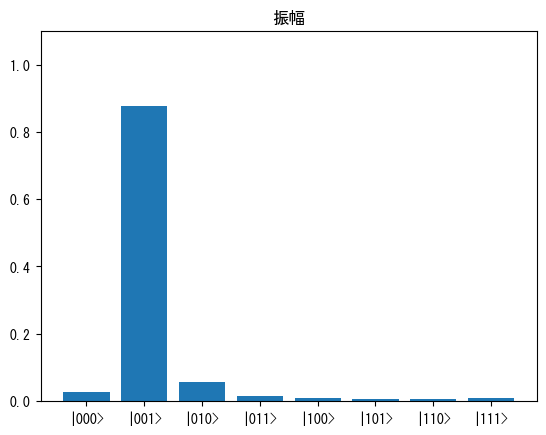

In [161]:
draw_8amp(q1000,q1001,q1010,q1011,q1100,q1101,q1110,q1111)